In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv("Social_Network_Ads.csv")

In [5]:
data = data.iloc[: , 2:]

In [9]:
ss = StandardScaler()
data["EstimatedSalary"] = ss.fit_transform(data[["EstimatedSalary"]]) 

In [10]:
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,-1.490046,0
1,35,-1.460681,0
2,26,-0.785290,0


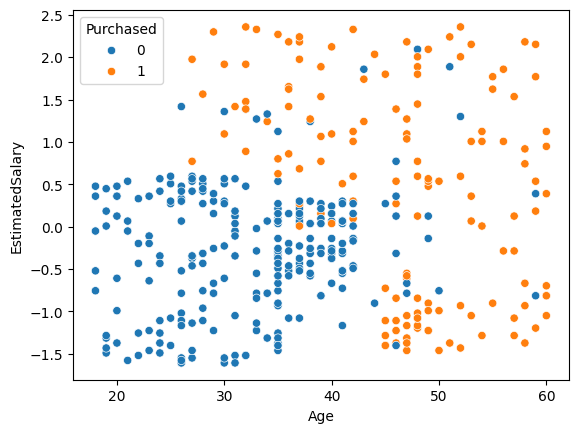

In [13]:
sns.scatterplot(x="Age" , y="EstimatedSalary" , data=data , hue="Purchased")
plt.show()

In [14]:
x = data.iloc[:, :-1]
y = data["Purchased"]

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 42)

In [24]:
for i in range(1,20):
    KNNC = KNeighborsClassifier(n_neighbors = i)
    KNNC.fit(x_train , y_train)
    print(i , KNNC.score(x_train , y_train)*100 , KNNC.score(x_test , y_test)*100)
    

1 99.6875 87.5
2 90.9375 85.0
3 91.25 90.0
4 89.375 86.25
5 89.0625 93.75
6 89.0625 93.75
7 89.375 95.0
8 88.75 93.75
9 88.75 92.5
10 88.75 92.5
11 88.75 92.5
12 88.4375 92.5
13 88.75 92.5
14 87.5 93.75
15 87.8125 92.5
16 85.9375 91.25
17 86.25 91.25
18 85.625 91.25
19 86.875 91.25


In [25]:
KNNC = KNeighborsClassifier(n_neighbors = 3)
KNNC.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
KNNC.score(x_train , y_train)*100 , KNNC.score(x_test , y_test)*100

(91.25, 90.0)

In [27]:
KNNC.predict([[19,-1.490046]])

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


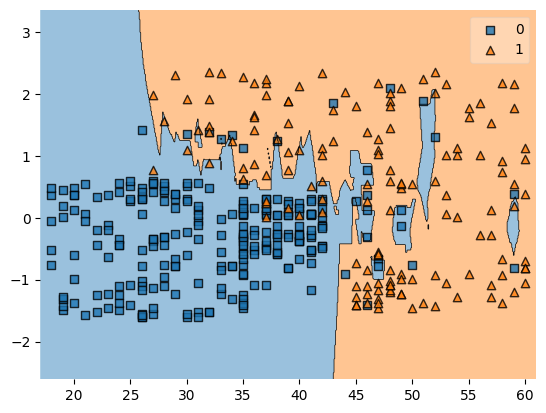

In [33]:
plot_decision_regions(x.to_numpy() , y.to_numpy() , clf = KNNC)
plt.show()